In [1]:
# Import TensorFlow and TensorFlow Datasets

import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

import gc
import tqdm
import cv2
import os
import time
import numpy as np

from datetime import datetime
from packaging import version

In [2]:
tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')]

In [3]:
def create_dataset(dataset):
  
    train = tfds.as_numpy(tfds.load(dataset, split="train", batch_size = -1))
    test  = tfds.as_numpy(tfds.load(dataset, split="test",  batch_size = -1))

    X_Train = train["image"] / 255
    X_Test =  test["image"] / 255
    Y_Train = to_categorical(train["label"])
    Y_Test =  to_categorical(test["label"])

    dataset = {"train" : (X_Train, Y_Train), "test" : (X_Test, Y_Test)}
    return dataset

def resize(X, dim, disable = False):
    tmp = []
    for i in tqdm.trange(X.shape[0], disable = disable):
        tmp.append(cv2.resize(X[i], dim))
    return np.stack(tmp, axis=0).astype('float32')

In [4]:
datasets = create_dataset("cifar10")

mnist_train, mnist_test = datasets['train'], datasets['test']

dim = (64,64)
#mnist_train[0] = resize(mnist_train[0], dim)
X_train = resize(mnist_test[0], dim)
Y_train = mnist_test[1]

100%|██████████| 10000/10000 [00:00<00:00, 10947.47it/s]


In [29]:
#strategy = tf.distribute.MirroredStrategy(cross_device_ops=tf.distribute.ReductionToOneDevice(reduce_to_device= '/cpu:0'), 
#                                          devices = ["/gpu:0", "/gpu:1", "/gpu:2", "/gpu:3"])
strategy = tf.distribute.MirroredStrategy(devices = ["/gpu:0", "/gpu:1", "/gpu:2", "/gpu:3"])

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')


In [30]:
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 4


In [31]:
BUFFER_SIZE = 10000

BATCH_SIZE_PER_REPLICA = 512
BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync

In [32]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(BATCH_SIZE).cache().prefetch(BUFFER_SIZE)

In [33]:
with strategy.scope():
    inp = tf.keras.applications.ResNet50V2(
    include_top=True, weights=None, input_tensor=None,
    input_shape=(*dim,3), pooling=None, classes=1000) 


    y_hat = tf.keras.layers.Dense(10, activation = "softmax")(inp.layers[-2].output)

    model = tf.keras.models.Model(inputs = inp.input, outputs = y_hat)
    model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ["accuracy"])

In [10]:
class Timer(tf.keras.callbacks.Callback):

    def __init__(self):
        super(Timer,self).__init__()
        self.time = []

    def on_epoch_begin(self, epoch, logs=None):
        self.time.append(time.time())

    def on_epoch_end(self, epoch, logs=None):
        self.time[epoch] = time.time() - self.time[epoch]



In [11]:
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '20,40')

In [ ]:
class Timer(tf.keras.callbacks.Callback):

    def __init__(self):
        super(Timer,self).__init__()
        self.time = []

    def on_epoch_begin(self, epoch, logs=None):
        self.time.append(time.time())

    def on_epoch_end(self, epoch, logs=None):
        self.time[epoch] = time.time() - self.time[epoch]


class Experiment():
    def __init__(self, exps = []):
        
        self.exps = exps
        self.data =
        self.dim =

    def load_data():
        
        pass
    def process_data():
        
        pass
    
    def experiment(gpus):
        
        
        reduce = strategy = tf.distribute.MirroredStrategy(cross_device_ops=tf.distribute.ReductionToOneDevice(reduce_to_device= '/cpu:0'), 
                                          devices = ["/gpu:0", "/gpu:1", "/gpu:2", "/gpu:3"])
        
        all_reduce = tf.distribute.MirroredStrategy(devices = ["/gpu:0", "/gpu:1", "/gpu:2", "/gpu:3"])
        
        
        
        
        BUFFER_SIZE = 10000

        BATCH_SIZE_PER_REPLICA = 512
        BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync  #stragety como usar
        
        
        
        train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(BATCH_SIZE).cache().prefetch(BUFFER_SIZE)
        
        
        
        with strategy.scope():
            inp = tf.keras.applications.ResNet50V2(
            include_top=True, weights=None, input_tensor=None,
            input_shape=(*dim,3), pooling=None, classes=1000) 


            y_hat = tf.keras.layers.Dense(10, activation = "softmax")(inp.layers[-2].output)

            model = tf.keras.models.Model(inputs = inp.input, outputs = y_hat)
            model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ["accuracy"])
            
        
        

        Timer_0 = Timer()
        model.fit(train_dataset, epochs=20, callbacks = [Timer_0])
        
        
        del model
        gc.collet()

def experiment():
    strategy = tf.distribute.MirroredStrategy(cross_device_ops=tf.distribute.ReductionToOneDevice(reduce_to_device= '/cpu:0'), 
                                          devices = ["/gpu:0", "/gpu:1", "/gpu:2", "/gpu:3"])
    #strategy = tf.distribute.MirroredStrategy(devices = ["/gpu:0", "/gpu:1", "/gpu:2", "/gpu:3"])

In [13]:
#Timer_1 = Timer()
model.fit(train_dataset, epochs=20)

Epoch 1/20
20/20 [==============================] - 6s 304ms/step - accuracy: 0.2891 - loss: 2.1126
Epoch 2/20
20/20 [==============================] - 4s 205ms/step - accuracy: 0.4591 - loss: 1.4758
Epoch 3/20
20/20 [==============================] - 4s 203ms/step - accuracy: 0.5881 - loss: 1.1371
Epoch 4/20
20/20 [==============================] - 4s 203ms/step - accuracy: 0.6685 - loss: 0.9127
Epoch 5/20
20/20 [==============================] - 4s 204ms/step - accuracy: 0.6559 - loss: 0.9552
Epoch 6/20
20/20 [==============================] - 4s 203ms/step - accuracy: 0.7445 - loss: 0.7172
Epoch 7/20
20/20 [==============================] - 4s 204ms/step - accuracy: 0.7941 - loss: 0.5812
Epoch 8/20
20/20 [==============================] - 4s 204ms/step - accuracy: 0.8305 - loss: 0.4707
Epoch 9/20
20/20 [==============================] - 4s 204ms/step - accuracy: 0.8704 - loss: 0.3607
Epoch 10/20
20/20 [==============================] - 4s 205ms/step - accuracy: 0.8737 - loss: 0.3559

KeyboardInterrupt: 

In [12]:
#Timer_2 = Timer()
model.fit(train_dataset, epochs=20)

Epoch 1/20
INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


5/5 [==============================] - 5s 1s/step - loss: 2.9269 - accuracy: 0.1786
Epoch 2/20
5/5 [==============================] - 2s 429ms/step - loss: 1.8726 - accuracy: 0.3320
Epoch 3/20
5/5 [==============================] - 2s 416ms/step - loss: 1.5257 - accuracy: 0.4410
Epoch 4/20
5/5 [==============================] - 2s 412ms/step - loss: 1.1927 - accuracy: 0.5693
Epoch 5/20
5/5 [==============================] - 2s 427ms/step - loss: 0.8062 - accuracy: 0.7167
Epoch 6/20
5/5 [==============================] - 2s 409ms/step - loss: 0.4967 - accuracy: 0.8335
Epoch 7/20
5/5 [==============================] - 2s 434ms/step - loss: 0.4142 - accuracy: 0.8605
Epoch 8/20
5/5 [==============================] - 2s 407ms/step - loss: 0.3779 - accuracy: 0.8681
Epoch 9/20
5/5 [==============================] - 2s 407ms/step - loss: 0.3179 - accuracy: 0.8857
Epoch 10/20
5/5 [==============================] - 2s 408ms/step - loss: 0.2663 - accuracy: 0.9076
Epoch 11/20
5/5 [================

KeyboardInterrupt: 

In [ ]:
#Timer_4 = Timer()
model.fit(train_dataset, epochs=20, callbacks = [tboard_callback])

Epoch 1/20
INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


5/5 [==============================] - 9s 2s/step - accuracy: 0.1764 - loss: 3.0219
Epoch 2/20
5/5 [==============================] - 5s 1s/step - accuracy: 0.3202 - loss: 1.8824
Epoch 3/20
5/5 [==============================] - 5s 1s/step - accuracy: 0.4489 - loss: 1.5290
Epoch 4/20
5/5 [==============================] - 5s 1s/step - accuracy: 0.5492 - loss: 1.2379
Epoch 5/20
5/5 [==============================] - 5s 1s/step - accuracy: 0.6991 - loss: 0.8509
Epoch 6/20
5/5 [==============================] - 5s 1s/step - accuracy: 0.7969 - loss: 0.5824
Epoch 7/20
5/5 [==============================] - 5s 1s/step - accuracy: 0.8344 - loss: 0.4816
Epoch 8/20
4/5 [=======================>......] - ETA: 0s - accuracy: 0.8724 - loss: 0.3677

In [10]:
#Timer_99 = Timer()
model.fit(train_dataset, epochs=20)

Epoch 1/20
20/20 [==============================] - 6s 304ms/step - loss: 2.0663 - accuracy: 0.2989
Epoch 2/20
20/20 [==============================] - 4s 208ms/step - loss: 1.4361 - accuracy: 0.4709
Epoch 3/20
20/20 [==============================] - 4s 206ms/step - loss: 1.0855 - accuracy: 0.6121
Epoch 4/20
20/20 [==============================] - 4s 206ms/step - loss: 0.9026 - accuracy: 0.6781
Epoch 5/20
13/20 [==================>...........] - ETA: 1s - loss: 0.9604 - accuracy: 0.6582

KeyboardInterrupt: 

In [12]:
#Timer_9999 = Timer()
model.fit(train_dataset, epochs=20)

Epoch 1/20
INFO:tensorflow:batch_all_reduce: 174 all-reduces with algorithm = nccl, num_packs = 1


INFO:tensorflow:batch_all_reduce: 174 all-reduces with algorithm = nccl, num_packs = 1


INFO:tensorflow:batch_all_reduce: 174 all-reduces with algorithm = nccl, num_packs = 1


INFO:tensorflow:batch_all_reduce: 174 all-reduces with algorithm = nccl, num_packs = 1


5/5 [==============================] - 6s 1s/step - accuracy: 0.1743 - loss: 2.9469
Epoch 2/20
5/5 [==============================] - 3s 615ms/step - accuracy: 0.3486 - loss: 1.8564
Epoch 3/20
5/5 [==============================] - 3s 628ms/step - accuracy: 0.4561 - loss: 1.5051
Epoch 4/20
5/5 [==============================] - 3s 625ms/step - accuracy: 0.5754 - loss: 1.1913
Epoch 5/20
5/5 [==============================] - 3s 628ms/step - accuracy: 0.7321 - loss: 0.7680
Epoch 6/20
5/5 [==============================] - 3s 629ms/step - accuracy: 0.7602 - loss: 0.7237
Epoch 7/20
5/5 [==============================] - 3s 623ms/step - accuracy: 0.7425 - loss: 0.7603
Epoch 8/20
5/5 [==============================] - 3s 618ms/step - accuracy: 0.8296 - loss: 0.5041
Epoch 9/20
5/5 [==============================] - 3s 615ms/step - accuracy: 0.9000 - loss: 0.2997
Epoch 10/20
5/5 [==============================] - 3s 616ms/step - accuracy: 0.9463 - loss: 0.1624
Epoch 11/20
1/5 [=====>..........

KeyboardInterrupt: 

In [34]:
Timer_0 = Timer()
model.fit(train_dataset, epochs=20, callbacks = [Timer_0])

Epoch 1/20
5/5 [==============================] - 3s 637ms/step - accuracy: 0.1798 - loss: 2.7967
Epoch 2/20
5/5 [==============================] - 3s 622ms/step - accuracy: 0.3388 - loss: 1.8854
Epoch 3/20
5/5 [==============================] - 3s 617ms/step - accuracy: 0.4584 - loss: 1.5251
Epoch 4/20
5/5 [==============================] - 3s 619ms/step - accuracy: 0.5604 - loss: 1.2283
Epoch 5/20
5/5 [==============================] - 3s 637ms/step - accuracy: 0.6336 - loss: 1.0334
Epoch 6/20
5/5 [==============================] - 3s 647ms/step - accuracy: 0.7837 - loss: 0.6302
Epoch 7/20
5/5 [==============================] - 3s 626ms/step - accuracy: 0.8536 - loss: 0.4135
Epoch 8/20
5/5 [==============================] - 3s 630ms/step - accuracy: 0.8753 - loss: 0.3638
Epoch 9/20
5/5 [==============================] - 3s 657ms/step - accuracy: 0.8702 - loss: 0.3760
Epoch 10/20
5/5 [==============================] - 3s 640ms/step - accuracy: 0.8791 - loss: 0.3482
Epoch 11/20
5/5 [==

In [35]:
NCCL = sum(Timer_0.time[1:]) / len(Timer_0.time[1:])

In [21]:
Timer_1 = Timer()
model.fit(train_dataset, epochs=20, callbacks = [Timer_1])

Epoch 1/20
INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


INFO:tensorflow:Reduce to /cpu:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3').


5/5 [==============================] - 5s 1s/step - accuracy: 0.1851 - loss: 2.8642
Epoch 2/20
5/5 [==============================] - 2s 421ms/step - accuracy: 0.3307 - loss: 1.8930
Epoch 3/20
5/5 [==============================] - 2s 403ms/step - accuracy: 0.4559 - loss: 1.4890
Epoch 4/20
5/5 [==============================] - 2s 403ms/step - accuracy: 0.5758 - loss: 1.1767
Epoch 5/20
5/5 [==============================] - 2s 405ms/step - accuracy: 0.7110 - loss: 0.8406
Epoch 6/20
5/5 [==============================] - 2s 402ms/step - accuracy: 0.7661 - loss: 0.6696
Epoch 7/20
5/5 [==============================] - 2s 411ms/step - accuracy: 0.8004 - loss: 0.5649
Epoch 8/20
5/5 [==============================] - 2s 404ms/step - accuracy: 0.8500 - loss: 0.4305
Epoch 9/20
5/5 [==============================] - 2s 402ms/step - accuracy: 0.8861 - loss: 0.3298
Epoch 10/20
5/5 [==============================] - 2s 408ms/step - accuracy: 0.9262 - loss: 0.2153
Epoch 11/20
5/5 [================

In [23]:
CPU = sum(Timer_1.time[1:]) / len(Timer_1.time[1:])

In [13]:
Timer_2 = Timer()
model.fit(train_dataset, epochs=20, callbacks = [Timer_2])

Epoch 1/20
20/20 [==============================] - 4s 205ms/step - loss: 0.8993 - accuracy: 0.6759
Epoch 2/20
20/20 [==============================] - 4s 205ms/step - loss: 0.8736 - accuracy: 0.6827
Epoch 3/20
20/20 [==============================] - 4s 205ms/step - loss: 0.6893 - accuracy: 0.7590
Epoch 4/20
20/20 [==============================] - 4s 205ms/step - loss: 0.5375 - accuracy: 0.8109
Epoch 5/20
20/20 [==============================] - 4s 206ms/step - loss: 0.4440 - accuracy: 0.8436
Epoch 6/20
20/20 [==============================] - 4s 205ms/step - loss: 0.3450 - accuracy: 0.8815
Epoch 7/20
20/20 [==============================] - 4s 205ms/step - loss: 0.2952 - accuracy: 0.8953
Epoch 8/20
20/20 [==============================] - 4s 206ms/step - loss: 0.1922 - accuracy: 0.9320
Epoch 9/20
20/20 [==============================] - 4s 206ms/step - loss: 0.1640 - accuracy: 0.9409
Epoch 10/20
20/20 [==============================] - 4s 206ms/step - loss: 0.1832 - accuracy: 0.9392

In [15]:
GPU_1 = sum(Timer_2.time[1:]) / len(Timer_2.time[1:])

In [34]:
a/c

1.6558305963919684

In [36]:
import matplotlib.pyplot as plt

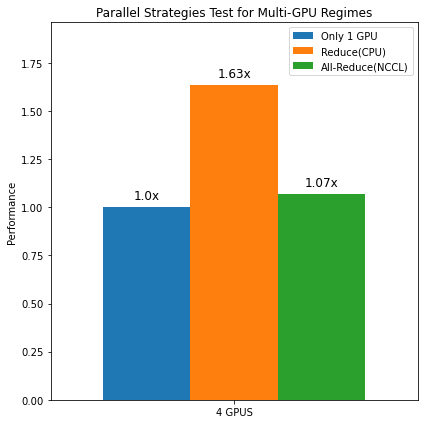

In [37]:

labels = ["4 GPUS"]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize = (6,6))



rects1 = ax.bar(x - width, GPU_1/GPU_1, width, label='Only 1 GPU')
rects2 = ax.bar(x, GPU_1/CPU, width, label='Reduce(CPU)')
rects3 = ax.bar(x + width, GPU_1/NCCL, width, label='All-Reduce(NCCL)')

ax.set_ylabel('Performance')
ax.set_title('Parallel Strategies Test for Multi-GPU Regimes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xmargin(0.2)
ax.set_ymargin(0.2)
ax.legend()

def autolabel(rects):

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3}x'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 'large', fontname = 'arial')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()